In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import ROCAUC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import time
import glob

In [2]:
import os
print(os.getcwd())

/data1/hom1/ict01/CIFAR-10-classification-main


In [3]:
ROOT_TRAIN_DIR = './data/train/'
ROOT_TEST_DIR = './data/test/'
IMG_WIDTH = 200
IMG_HEIGHT = 200

### 데이터 준비

In [4]:
# 각 클래스 폴더명을 이용하여 클래스 레이블 만들기

def load_label_info(root_dir):
    categories = [data_class.split('/')[-1] for data_class in glob.glob(root_dir+'/*')]
    n_classes = len(categories)
    return categories, n_classes

categories, n_classes = load_label_info(ROOT_TRAIN_DIR)
categories.sort()
print(categories)

['tomato_0', 'tomato_1', 'tomato_2', 'tomato_3']


In [5]:
train_X=[]
train_Y=[]

for idx, cat in enumerate(categories): # 클래스 수만큼 클래스의 인덱스와 클래스명을 뽑아냄
    label = idx
    image_dir = ROOT_TRAIN_DIR+'/'+cat+'/'
    print(image_dir)
    for _, _, f in os.walk(image_dir): # 해당 폴더의 상위 디렉토리, 디렉토리, 파일이름 을 뽑아냄
        for filename in f: # 파일 수 만큼 반복           
            img = cv2.imread(image_dir+filename,1) # 이미지파일 이미지화
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 그레이스케일로 변경
            img = cv2.resize(img, None, fx=IMG_WIDTH/img.shape[1], fy=IMG_HEIGHT/img.shape[0]) # 이미지 사이즈 변경
            train_X.append(img/256) # 각 이미지를 정규화 시켜서 X라는 빈 배열에 넣음
            train_Y.append(label) # 레이블 인덱스를 Y라는 빈 배열에 넣음

train_X = np.array(train_X) # 배열 넘파이 배열화
print(train_X.shape)
train_X = train_X.reshape(1941,(200*200*3)) # 배열 모양 변경
train_Y = np.array(train_Y)
print(train_X.shape)
print(train_Y.shape)    

./data/train//tomato_0/
./data/train//tomato_1/
./data/train//tomato_2/
./data/train//tomato_3/
(1941, 200, 200, 3)
(1941, 120000)
(1941,)


In [6]:
test_X=[]
test_Y=[]

for idx, cat in enumerate(categories): # 클래스 수만큼 클래스의 인덱스와 클래스명을 뽑아냄
    label = idx
    image_dir = ROOT_TEST_DIR+'/'+cat+'/'
    print(image_dir)
    for _, _, f in os.walk(image_dir): # 해당 폴더의 상위 디렉토리, 디렉토리, 파일이름 을 뽑아냄
        for filename in f: # 파일 수 만큼 반복           
            img = cv2.imread(image_dir+filename,1) # 이미지파일 이미지화
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 그레이스케일로 변경
            img = cv2.resize(img, None, fx=IMG_WIDTH/img.shape[1], fy=IMG_HEIGHT/img.shape[0]) # 이미지 사이즈 변경
            test_X.append(img/256) # 각 이미지를 정규화 시켜서 X라는 빈 배열에 넣음
            test_Y.append(label) # 레이블 인덱스를 Y라는 빈 배열에 넣음

test_X = np.array(test_X) # 배열 넘파이 배열화
print(test_X.shape)
test_X = test_X.reshape(test_X.shape[0],(200*200*3)) # 배열 모양 변경
test_Y = np.array(test_Y)
print(test_X.shape)
print(test_Y.shape)    

./data/test//tomato_0/
./data/test//tomato_1/
./data/test//tomato_2/
./data/test//tomato_3/
(103, 200, 200, 3)
(103, 120000)
(103,)


In [7]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42) #테스트 데이터화 학습 데이터 나누기
print(train_X.shape)

NameError: name 'X' is not defined

### 차원 축소 기법을 적용시키지 않은 모델

#### Logistic Regression

In [7]:
log_reg_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=5000, C=100)

start = time.time()
log_reg_clf.fit(train_X, train_Y)
log_reg_train_time = time.time() - start
print("log_reg_train_time : ", log_reg_train_time)

log_reg_clf_train_score = log_reg_clf.score(train_X, train_Y)
print("log_reg_clf_train_score : ", log_reg_clf_train_score)

start = time.time()
log_reg_clf_test_score = log_reg_clf.score(test_X, test_Y)
print("log_reg_clf_test_score : ", log_reg_clf_test_score)
log_reg_clf_test_time = time.time() - start
print("log_reg_clf_test_time : ", log_reg_clf_test_time)

log_reg_train_time :  662.8567922115326
log_reg_clf_train_score :  1.0
log_reg_clf_test_score :  0.9320388349514563
log_reg_clf_test_time :  0.014410734176635742


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


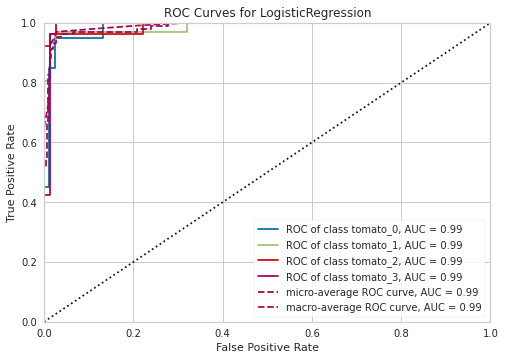

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [8]:
log_reg_visualizer = ROCAUC(log_reg_clf, classes=categories)
log_reg_visualizer.fit(train_X, train_Y)
log_reg_visualizer.score(test_X, test_Y)
log_reg_visualizer.show()

#### SVM(Support Vector Machine)

In [9]:
svm_clf = svm.SVC(kernel='rbf', C=10, gamma=0.001, max_iter=5000)

start = time.time()
svm_clf.fit(train_X, train_Y)
svm_clf_train_time = time.time() - start
print("svm_clf_train_time : ", svm_clf_train_time)

svm_clf_train_score = svm_clf.score(train_X, train_Y)
print("svm_clf_train_score : ", svm_clf_train_score)

start = time.time()
svm_clf_test_score = svm_clf.score(test_X, test_Y)
print("svm_clf_test_score : ", svm_clf_test_score)
svm_clf_test_time = time.time() - start
print("svm_clf_test_time : ", svm_clf_test_time)

svm_clf_train_time :  1416.8452410697937
svm_clf_train_score :  1.0
svm_clf_test_score :  0.970873786407767
svm_clf_test_time :  208.02979922294617


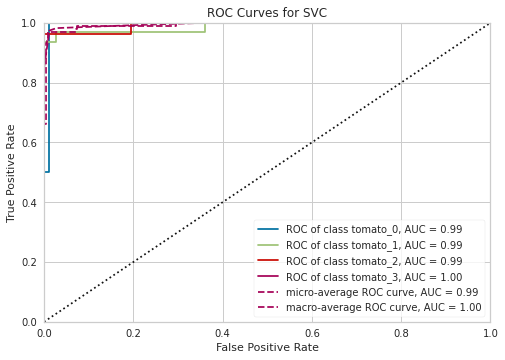

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [10]:
svm_visualizer = ROCAUC(svm_clf, classes=categories)
svm_visualizer.fit(train_X, train_Y)
svm_visualizer.score(test_X, test_Y)
svm_visualizer.show()

#### Decision Tree

In [11]:
dt_clf = DecisionTreeClassifier(random_state=42)

start = time.time()
dt_clf.fit(train_X, train_Y)
dt_clf_train_time = time.time() - start
print("dt_clf_train_time : ", dt_clf_train_time)

dt_clf_train_score = dt_clf.score(train_X, train_Y)
print("dt_clf_train_score : ", dt_clf_train_score)

start = time.time()
dt_clf_test_score = dt_clf.score(test_X, test_Y)
print("dt_clf_test_score : ", dt_clf_test_score)
dt_clf_test_time = time.time() - start
print("dt_clf_test_time : ", dt_clf_test_time)

dt_clf_train_time :  139.1870241165161
dt_clf_train_score :  1.0
dt_clf_test_score :  0.7766990291262136
dt_clf_test_time :  0.019360780715942383


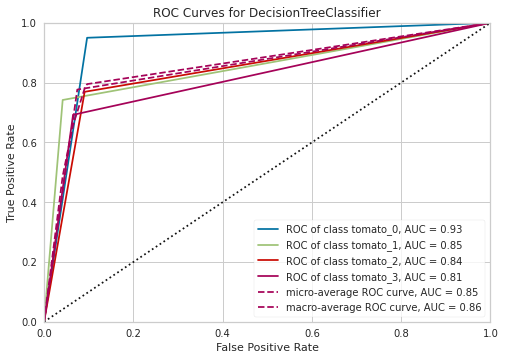

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [12]:
dt_visualizer = ROCAUC(dt_clf, classes=categories)
dt_visualizer.fit(train_X, train_Y)
dt_visualizer.score(test_X, test_Y)
dt_visualizer.show()

### PCA

#### Logistic Regression

In [19]:
pca_log_reg_clf = Pipeline([
    ("pca", PCA(n_components=10)),
    ("log_reg_clf", LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=5000, C=100))
])

start = time.time()
pca_log_reg_clf.fit(train_X, train_Y)
pca_log_reg_clf_train_time = time.time() - start
print("pca_log_reg_clf_train_time : ", pca_log_reg_clf_train_time)

start = time.time()
pca_log_reg_clf_score = pca_log_reg_clf.score(test_X, test_Y)
print("pca_log_reg_clf_score : ", pca_log_reg_clf_score)
pca_log_reg_clf_test_time = time.time() - start
print("pca_log_reg_clf_test_time : ", pca_log_reg_clf_test_time)

pca_log_reg_clf_train_time :  3.5087387561798096
pca_log_reg_clf_score :  0.6601941747572816
pca_log_reg_clf_test_time :  0.03231549263000488


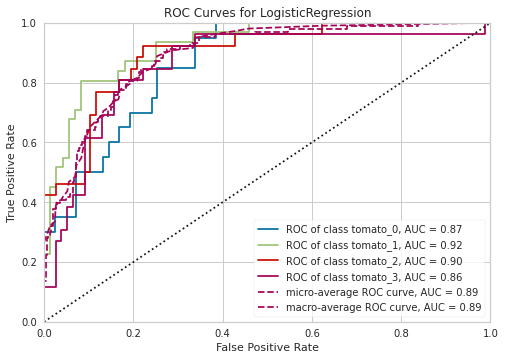

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [20]:
pca_log_reg_visualizer = ROCAUC(pca_log_reg_clf, classes=categories)
pca_log_reg_visualizer.fit(train_X, train_Y)
pca_log_reg_visualizer.score(test_X, test_Y)
pca_log_reg_visualizer.show()

#### SVM

In [21]:
pca_svm_clf = Pipeline([
    ("pca", PCA(n_components=10)),
    ("svm_clf", svm.SVC(kernel='rbf', C=10, gamma=0.001, max_iter=5000))
])

start = time.time()
pca_svm_clf.fit(train_X, train_Y)
pca_svm_clf_train_time = time.time() - start
print("pca_svm_clf_train_time : ", pca_svm_clf_train_time)

start = time.time()
pca_svm_clf_score = pca_svm_clf.score(test_X, test_Y)
print("pca_svm_clf_score : ", pca_svm_clf_score)
pca_svm_clf_test_time = time.time() - start
print("pca_svm_clf_test_time : ", pca_svm_clf_test_time)

pca_svm_clf_train_time :  3.462169885635376
pca_svm_clf_score :  0.9805825242718447
pca_svm_clf_test_time :  0.03558635711669922


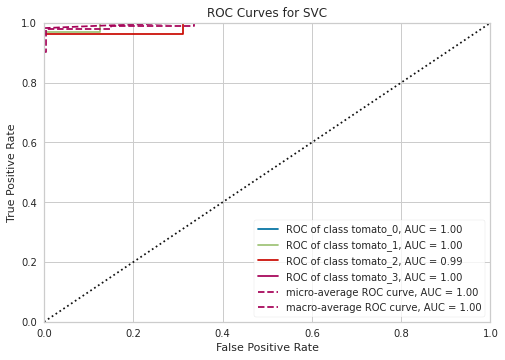

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [22]:
pca_svm_visualizer = ROCAUC(pca_svm_clf, classes=categories)
pca_svm_visualizer.fit(train_X, train_Y)
pca_svm_visualizer.score(test_X, test_Y)
pca_svm_visualizer.show()